In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


In [288]:
X=np.load("X.npy")
y=np.load("y.npy")

In [289]:
X

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [290]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [293]:
len(X_train)

9090

In [294]:
len(X_test)

3897

In [295]:
from sklearn.preprocessing import MinMaxScaler

In [296]:
scaler=MinMaxScaler()

In [297]:
X_train=scaler.fit_transform(X_train)

In [298]:
X_test=scaler.transform(X_test)

In [299]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [312]:
model= Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [323]:
model.fit(X_train,y_train,batch_size=256,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
36/36 [==============================] - 0s 4ms/step - loss: 81960544.0000 - val_loss: 83502800.0000
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 81565456.0000 - val_loss: 83104920.0000
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 81178920.0000 - val_loss: 82693920.0000
Epoch 4/300
36/36 [==============================] - 0s 3ms/step - loss: 80785352.0000 - val_loss: 82332192.0000
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 80397608.0000 - val_loss: 81942320.0000
Epoch 6/300
36/36 [==============================] - 0s 3ms/step - loss: 80018808.0000 - val_loss: 81570016.0000
Epoch 7/300
36/36 [==============================] - 0s 3ms/step - loss: 79639952.0000 - val_loss: 81178608.0000
Epoch 8/300
36/36 [==============================] - 0s 3ms/step - loss: 79257544.0000 - val_loss: 80800824.0000
Epoch 9/300
36/36 [==============================] - 0s 3ms/step - loss: 78889320.0000 - val_los

In [324]:
lossData=pd.DataFrame(model.history.history)

In [325]:
lossData.head()

,loss,val_loss
0,81960544.0,83502800.0
1,81565456.0,83104920.0
2,81178920.0,82693920.0
3,80785352.0,82332192.0
4,80397608.0,81942320.0


<AxesSubplot:>

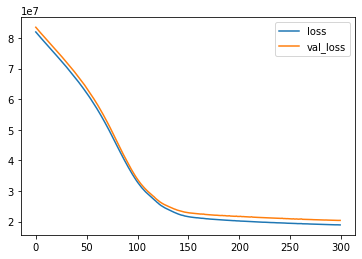

In [326]:
lossData.plot()

In [327]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [328]:
predictArr=model.predict(X_test)

122/122 [==============================] - 0s 1ms/step


In [329]:
mean_absolute_error(y_test,predictArr)

3214.523763244018

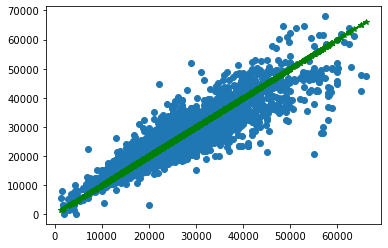

In [330]:
plt.scatter(y_test,predictArr)
plt.plot(y_test,y_test,"g-*")

# OverFitting için örnek;

In [277]:


model= Sequential()

model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mean_squared_error")

In [278]:
model.fit(X_train,y_train,batch_size=256,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
36/36 [==============================] - 1s 7ms/step - loss: 672093504.0000 - val_loss: 686316800.0000
Epoch 2/30
36/36 [==============================] - 0s 3ms/step - loss: 671622080.0000 - val_loss: 677393984.0000
Epoch 3/30
36/36 [==============================] - 0s 3ms/step - loss: 668328064.0000 - val_loss: 650586304.0000
Epoch 4/30
36/36 [==============================] - 0s 3ms/step - loss: 651768448.0000 - val_loss: 617900928.0000
Epoch 5/30
36/36 [==============================] - 0s 3ms/step - loss: 592302976.0000 - val_loss: 586217728.0000
Epoch 6/30
36/36 [==============================] - 0s 3ms/step - loss: 444763616.0000 - val_loss: 541102848.0000
Epoch 7/30
36/36 [==============================] - 0s 3ms/step - loss: 222356032.0000 - val_loss: 532924256.0000
Epoch 8/30
36/36 [==============================] - 0s 3ms/step - loss: 97911736.0000 - val_loss: 536559136.0000
Epoch 9/30
36/36 [==============================] - 0s 3ms/step - loss: 88218432.0000 - v

In [279]:
lossData=pd.DataFrame(model.history.history)

<AxesSubplot:>

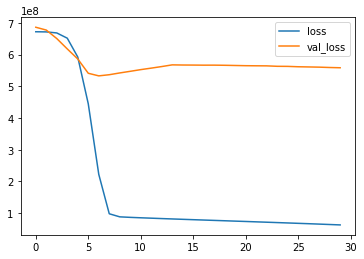

In [280]:
lossData.plot()

Burada Val_loss değerinin loss değerinden ayrıldığını görüntülüyoruz. Bu duruma Overfitting ismi veriliyor. Bu durumda epochs azaltılabileceği gibi başka işlemler de gerçekleştirilebilir. 